# Convert OpenGWAS Project vcf file to PLINK GWAS formats  

Alzheimer's Disease GWAS data downloaded from OpenGWAS Project:  
https://gwas.mrcieu.ac.uk/datasets/ieu-a-298/

#### Imports & Setup

In [1]:
import pandas as pd

import allel, io
print(allel.__version__)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1.3.2


#### File I/O variables

In [2]:
vcf_file = '../data/gwas_vcf/ieu-a-298.vcf'
assoc_out = '../data/gwas_plink/ieu-a-298.assoc'
logistic_out = '../data/gwas_plink/ieu-a-298.assoc.logistic'

#### Read in VCF file  

##FORMAT=<ID=ES,Number=A,Type=Float,Description="Effect size estimate relative to the alternative allele">
##FORMAT=<ID=SE,Number=A,Type=Float,Description="Standard error of effect size estimate">
##FORMAT=<ID=LP,Number=A,Type=Float,Description="-log10 p-value for effect estimate">
##FORMAT=<ID=SS,Number=A,Type=Float,Description="Sample size used to estimate genetic effect">
##FORMAT=<ID=ID,Number=1,Type=String,Description="Study variant identifier">


In [3]:
!grep "##FORMAT="  {vcf_file}

##FORMAT=<ID=ES,Number=A,Type=Float,Description="Effect size estimate relative to the alternative allele">
##FORMAT=<ID=SE,Number=A,Type=Float,Description="Standard error of effect size estimate">
##FORMAT=<ID=LP,Number=A,Type=Float,Description="-log10 p-value for effect estimate">
##FORMAT=<ID=AF,Number=A,Type=Float,Description="Alternate allele frequency in the association study">
##FORMAT=<ID=SS,Number=A,Type=Float,Description="Sample size used to estimate genetic effect">
##FORMAT=<ID=EZ,Number=A,Type=Float,Description="Z-score provided if it was used to derive the EFFECT and SE fields">
##FORMAT=<ID=SI,Number=A,Type=Float,Description="Accuracy score of summary data imputation">
##FORMAT=<ID=NC,Number=A,Type=Float,Description="Number of cases used to estimate genetic effect">
##FORMAT=<ID=ID,Number=1,Type=String,Description="Study variant identifier">


In [4]:
!awk 'NR >= 110 && NR <= 115'  {vcf_file}

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	ieu-a-298
1	2256288	rs76805690	C	A	.	PASS	.	ES:SE:LP:SS:ID	0.0389:0.0175:1.58536:74046:rs76805690
1	2261983	rs75379543	C	A	.	PASS	.	ES:SE:LP:SS:ID	0.0427:0.0167:1.96738:74046:rs75379543
1	2263666	rs75273719	G	A	.	PASS	.	ES:SE:LP:SS:ID	0.0502:0.0171:2.47353:74046:rs75273719
1	2263888	rs903904	C	T	.	PASS	.	ES:SE:LP:SS:ID	0.0413:0.0169:1.82769:74046:rs903904
1	2265070	rs80107522	T	C	.	PASS	.	ES:SE:LP:SS:ID	0.0446:0.0168:2.11328:74046:rs80107522


#### using scikit-allel package  

https://scikit-allel.readthedocs.io/

In [5]:
vcf_in = allel.vcf_to_dataframe(vcf_file, fields='*')
vcf_in.head()

CHROM      POS          ID REF ALT_1  ALT_2  ALT_3  QUAL  AF_1  AF_2  AF_3  \
0     1  2256288  rs76805690   C     A    NaN    NaN   NaN   NaN   NaN   NaN   
1     1  2261983  rs75379543   C     A    NaN    NaN   NaN   NaN   NaN   NaN   
2     1  2263666  rs75273719   G     A    NaN    NaN   NaN   NaN   NaN   NaN   
3     1  2263888    rs903904   C     T    NaN    NaN   NaN   NaN   NaN   NaN   
4     1  2265070  rs80107522   T     C    NaN    NaN   NaN   NaN   NaN   NaN   

   FILTER_PASS  numalt  altlen_1  altlen_2  altlen_3  is_snp  
0         True       1         0         0         0    True  
1         True       1         0         0         0    True  
2         True       1         0         0         0    True  
3         True       1         0         0         0    True  
4         True       1         0         0         0    True

In [6]:
vcf_in = allel.vcf_to_dataframe(vcf_file, alt_number=1, fields=['variants/*', 'calldata/ES', 'calldata/SE', 'calldata/LP', 'calldata/SS'])
vcf_in.head()

CHROM      POS          ID REF ALT  QUAL  AF  FILTER_PASS  numalt  altlen  \
0     1  2256288  rs76805690   C   A   NaN NaN         True       1       0   
1     1  2261983  rs75379543   C   A   NaN NaN         True       1       0   
2     1  2263666  rs75273719   G   A   NaN NaN         True       1       0   
3     1  2263888    rs903904   C   T   NaN NaN         True       1       0   
4     1  2265070  rs80107522   T   C   NaN NaN         True       1       0   

   is_snp  
0    True  
1    True  
2    True  
3    True  
4    True

In [7]:
vcf_in = allel.vcf_to_dataframe(vcf_file, alt_number=1, fields=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'ES', 'SE', 'LP', 'SS'])
vcf_in.head()

CHROM      POS          ID REF ALT
0     1  2256288  rs76805690   C   A
1     1  2261983  rs75379543   C   A
2     1  2263666  rs75273719   G   A
3     1  2263888    rs903904   C   T
4     1  2265070  rs80107522   T   C

In [8]:
vcf_in = allel.vcf_to_dataframe(vcf_file, alt_number=1, fields=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'calldata/ES', 'calldata/SE', 'calldata/LP', 'calldata/SS'])
vcf_in.head()

CHROM      POS          ID REF ALT
0     1  2256288  rs76805690   C   A
1     1  2261983  rs75379543   C   A
2     1  2263666  rs75273719   G   A
3     1  2263888    rs903904   C   T
4     1  2265070  rs80107522   T   C

#### <font color='blue'> Bummer! scikit-allel package doesn't seem to work for FORMAT fields :( </font>  

> need to find alternative approach

### read vcf file using alterative Python approach

In [9]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})


def read_header(path):
    with open(path, 'r') as f:
        header = [l for l in f if l.startswith('##')]
    return header

In [10]:
vcf_in = read_vcf(vcf_file)

vcf_in.shape
vcf_in.head()

(10684, 10)

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   
3     1  2263888    rs903904   C   T    .   PASS    .  ES:SE:LP:SS:ID   
4     1  2265070  rs80107522   T   C    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298  
0  0.0389:0.0175:1.58536:74046:rs76805690  
1  0.0427:0.0167:1.96738:74046:rs75379543  
2  0.0502:0.0171:2.47353:74046:rs75273719  
3    0.0413:0.0169:1.82769:74046:rs903904  
4  0.0446:0.0168:2.11328:74046:rs80107522

In [11]:
cols_input = vcf_in.columns.to_list()
cols_input

['CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 'ieu-a-298']

In [12]:
cols_input[-1]

'ieu-a-298'

### Extract vcf format fields --> separate columns

Extract format field names from 'FORMAT' column

In [13]:
_fmt_str = vcf_in.loc[0, 'FORMAT']
_fmt_str

_fmt_list = _fmt_str.split(':')
_fmt_list

'ES:SE:LP:SS:ID'

['ES', 'SE', 'LP', 'SS', 'ID']

Split sample column --> format fields

In [14]:
# df_vcf = vcf_in.copy()

vcf_in[_fmt_list] = vcf_in[cols_input[-1]].str.split(':', expand=True)

vcf_in.head()

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   
3     1  2263888    rs903904   C   T    .   PASS    .  ES:SE:LP:SS:ID   
4     1  2265070  rs80107522   T   C    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298      ES      SE       LP     SS  
0  0.0389:0.0175:1.58536:74046:rs76805690  0.0389  0.0175  1.58536  74046  
1  0.0427:0.0167:1.96738:74046:rs75379543  0.0427  0.0167  1.96738  74046  
2  0.0502:0.0171:2.47353:74046:rs75273719  0.0502  0.0171  2.47353  74046  
3    0.0413:0.0169:1.82769:74046:rs903904  0.0413  0.0169  1.82769  74046  
4  0.0446:0.0168:2.11328:74046:rs80107522  0.0446  0.0168  2.11328  74046

<br>  

<br>  

# Convert extracted vcf DF to PLINK format

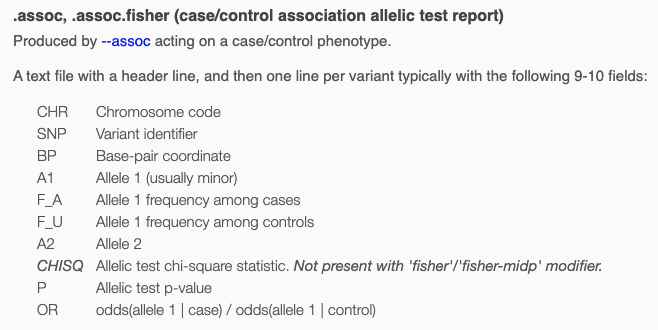  


https://www.cog-genomics.org/plink/1.9/formats#assoc

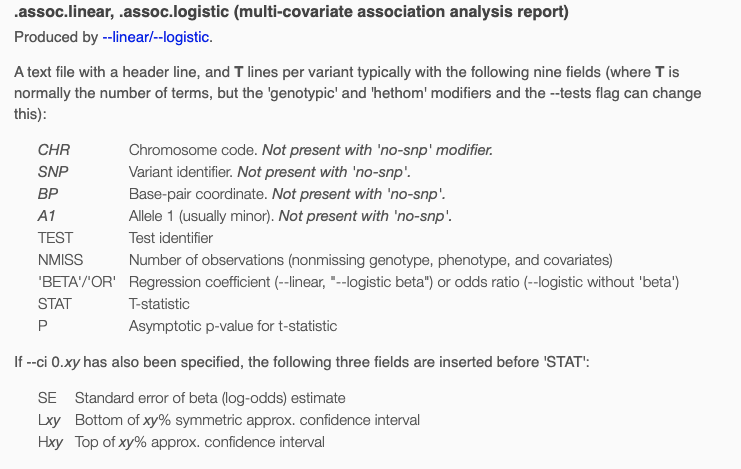  

https://www.cog-genomics.org/plink/1.9/formats#assoc_linear

In [15]:
cols_assoc = ['CHR', 'SNP', 'BP', 'A1', 'F_A', 'F_U', 'A2', 'CHISQ', 'P', 'OR']
cols_logistic = ['CHR', 'SNP', 'BP', 'A1', 'TEST', 'NMISS', 'OR', 'SE', 'STAT', 'P']

In [16]:
df = vcf_in.copy() 

**add renamed columns:**  
* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  


**add columns with "dummy" values:**  
* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)  
* NMISS = .logistic number of observations (nonmissing genotype, phenotype, & covar)  
* STAT = .logistic t-statistic  


**convert vcf columns to plink columns:**  

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  


In [17]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ieu-a-298', 'ES', 'SE', 'LP', 'SS'],
      dtype='object')

**add renamed columns:**  
* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = SS = sample size (approx, not quite the number of observations)

In [18]:
df['CHR'] = df['CHROM'].copy()
df['BP'] = df['POS'].copy()
df['A1'] = df['ALT'].copy()
df['A2'] = df['REF'].copy()
df['OR'] = df['ES'].copy()
df['NMISS'] = df['SS'].copy()

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298      ES      SE       LP     SS CHR  \
0  0.0389:0.0175:1.58536:74046:rs76805690  0.0389  0.0175  1.58536  74046   1   
1  0.0427:0.0167:1.96738:74046:rs75379543  0.0427  0.0167  1.96738  74046   1   
2  0.0502:0.0171:2.47353:74046:rs75273719  0.0502  0.0171  2.47353  74046   1   

        BP A1 A2      OR  NMISS  
0  2256288  A  C  0.0389  74046  
1  2261983  A  C  0.0427  74046  
2  2263666  A  G  0.0502  74046

**add columns with "dummy" values:**  
* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)  
* STAT = .logistic t-statistic  


In [19]:
df['F_A'] = 0.0 
df['F_U'] = 0.0 
df['CHISQ'] = 0.0 
df['TEST'] = 'ADD' 
df['STAT'] = 0.0 

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298  ...       BP A1 A2      OR  NMISS  \
0  0.0389:0.0175:1.58536:74046:rs76805690  ...  2256288  A  C  0.0389  74046   
1  0.0427:0.0167:1.96738:74046:rs75379543  ...  2261983  A  C  0.0427  74046   
2  0.0502:0.0171:2.47353:74046:rs75273719  ...  2263666  A  G  0.0502  74046   

   F_A  F_U CHISQ TEST STAT  
0  0.0  0.0   0.0  ADD  0.0  
1  0.0  0.0   0.0  ADD  0.0  
2  0.0  0.0   0.0  ADD  0.0  

[3 rows x 25 columns]

**convert vcf columns to plink columns:**  

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  

In [20]:
df['SNP'] = df['CHROM'].astype(str) + '_' + df['POS'].astype(str) + '_' + df['ID'].astype(str) 

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298  ... A1 A2      OR  NMISS  F_A  F_U  \
0  0.0389:0.0175:1.58536:74046:rs76805690  ...  A  C  0.0389  74046  0.0  0.0   
1  0.0427:0.0167:1.96738:74046:rs75379543  ...  A  C  0.0427  74046  0.0  0.0   
2  0.0502:0.0171:2.47353:74046:rs75273719  ...  A  G  0.0502  74046  0.0  0.0   

  CHISQ TEST STAT                   SNP  
0   0.0  ADD  0.0  1_2256288_rs76805690  
1   0.0  ADD  0.0  1_2261983_rs75379543  
2   0.0  ADD  0.0  1_2263666_rs75273719  

[3 rows x 26 columns]

In [21]:
df['LP'] = df['LP'].astype(float)

df['P'] = pow(10, -df['LP'])

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER INFO          FORMAT  \
0     1  2256288  rs76805690   C   A    .   PASS    .  ES:SE:LP:SS:ID   
1     1  2261983  rs75379543   C   A    .   PASS    .  ES:SE:LP:SS:ID   
2     1  2263666  rs75273719   G   A    .   PASS    .  ES:SE:LP:SS:ID   

                                ieu-a-298  ... A2      OR  NMISS  F_A  F_U  \
0  0.0389:0.0175:1.58536:74046:rs76805690  ...  C  0.0389  74046  0.0  0.0   
1  0.0427:0.0167:1.96738:74046:rs75379543  ...  C  0.0427  74046  0.0  0.0   
2  0.0502:0.0171:2.47353:74046:rs75273719  ...  G  0.0502  74046  0.0  0.0   

   CHISQ TEST STAT                   SNP         P  
0    0.0  ADD  0.0  1_2256288_rs76805690  0.025980  
1    0.0  ADD  0.0  1_2261983_rs75379543  0.010780  
2    0.0  ADD  0.0  1_2263666_rs75273719  0.003361  

[3 rows x 27 columns]

In [22]:
df[['LP', 'P']].head(10)

LP         P
0  1.585360  0.025980
1  1.967380  0.010780
2  2.473530  0.003361
3  1.827690  0.014870
4  2.113280  0.007704
5  0.055962  0.879100
6  0.012021  0.972700
7  0.925915  0.118600
8  3.352420  0.000444
9  1.719420  0.019080

<br>  

## extract columns for .assoc + .logistic output files

In [23]:
df_assoc = df[cols_assoc]
df_logistic = df[cols_logistic]

df_assoc.shape
df_logistic.shape
df.shape

(10684, 10)

(10684, 10)

(10684, 27)

In [24]:
df_assoc.head(2)
df_logistic.head(2)

CHR                   SNP       BP A1  F_A  F_U A2  CHISQ        P      OR
0   1  1_2256288_rs76805690  2256288  A  0.0  0.0  C    0.0  0.02598  0.0389
1   1  1_2261983_rs75379543  2261983  A  0.0  0.0  C    0.0  0.01078  0.0427

CHR                   SNP       BP A1 TEST  NMISS      OR      SE  STAT  \
0   1  1_2256288_rs76805690  2256288  A  ADD  74046  0.0389  0.0175   0.0   
1   1  1_2261983_rs75379543  2261983  A  ADD  74046  0.0427  0.0167   0.0   

         P  
0  0.02598  
1  0.01078

### write output files

In [25]:
df_assoc.to_csv(assoc_out, header=True, index=False, sep=' ')
df_logistic.to_csv(logistic_out, header=True, index=False, sep=' ')